In [18]:
import numpy as np
import matplotlib.pyplot as plt
import os 

In [22]:
DATASET_PATH = "/home/onyxia/work/hackathon-acoustic-2024/data/LivingRoom_preprocessed_hack/Human2/"

In [23]:
# Load centroid (humain xy positions)

centroid = np.load(os.path.join(DATASET_PATH, 'centroid.npy'))
print(f"Shape Centroide : {centroid.shape} ")

Shape Centroide : (104, 2) 


In [24]:
RIRs = np.load(os.path.join(DATASET_PATH, "deconvoled_trim.npy"), mmap_mode='r')
print(f"Shape RIRs : {RIRs.shape} ")


Shape RIRs : (104, 4, 667200) 


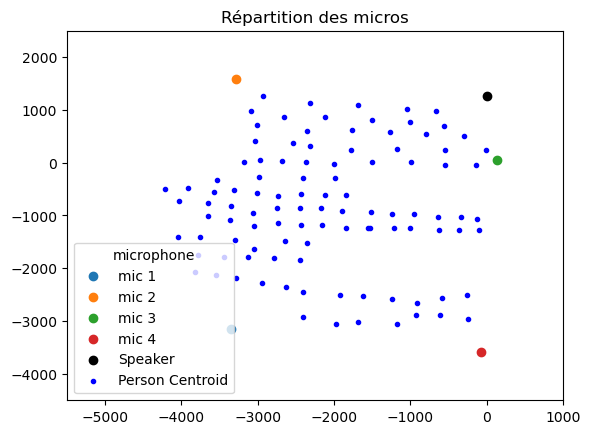

In [44]:
mic_height = 50.3125
feet = 12
y_tile = 23.5
x_tile = 11 +7/8

camera_origin_location = np.array([-6*x_tile-5.75, -y_tile, 45+13/16])*25.4

mic_1 = np.array([-11*x_tile - 1, -5*y_tile - 6-3/8, mic_height]) * 25.4 
mic_4= np.array([-11*x_tile + 1.25 + 1/16, 2.5*y_tile+3.75, mic_height]) * 25.4
mic_6 = np.array([5+3/8, 2+1/8, mic_height]) * 25.4
mic_9 = np.array([-3, -6*y_tile - 0.5, mic_height]) * 25.4


mic_xyzs = np.stack((mic_1,mic_4, mic_6, mic_9),axis=0)

SPEAKER_BOTTOM_RIGHT_Y = (1200.15 + 1196.975 + 1206.5)/ 3
SPEAKER_BOTTOM_RIGHT_X = (88.9 + 107.95 + 101.6) / 3
SPEAKER_BOTTOM_LEFT_Y = (1327.15 + 1311.55712764 + 1317.625) / 3
SPEAKER_BOTTOM_LEFT_X = - 76.98583188

speaker_xyz_bottom_right = np.array([SPEAKER_BOTTOM_RIGHT_X, SPEAKER_BOTTOM_RIGHT_Y, 44.5*25.4])
speaker_xyz_bottom_left = np.array([SPEAKER_BOTTOM_LEFT_X, SPEAKER_BOTTOM_LEFT_Y, 44.5*25.4])
speaker_xyz_top_right = np.array([SPEAKER_BOTTOM_RIGHT_X, SPEAKER_BOTTOM_RIGHT_Y, (44.5+17)*25.4])
speaker_xyz_top_left = np.array([SPEAKER_BOTTOM_LEFT_X, SPEAKER_BOTTOM_LEFT_Y, (44.5+17)*25.4])
speaker_xyz = (speaker_xyz_bottom_right+speaker_xyz_bottom_left+speaker_xyz_top_right+speaker_xyz_top_left)/4


walls = None
x_min = - 4000
x_max = 500
y_min = -4000
y_max = 2000


## affichier la disposition des microphones.
for idx, mic in enumerate(mic_xyzs):
    plt.scatter(mic[0], mic[1], label=f'mic {idx+1}')

plt.scatter(speaker_xyz[0], speaker_xyz[1], color='black', label='Speaker')


plt.scatter(centroid[:, 0], centroid[:, 1], label='Person Centroid', c='b', marker='.')

plt.title("Répartition des micros")
plt.xlim([-5500, 1000])
plt.ylim([-4500, 2500])
plt.legend(loc="lower left", title="microphone")
plt.show()

[1.32263867e-05 4.04477396e-06 1.72964337e-05 ... 1.42459985e-05
 7.06920127e-06 1.52228458e-05]


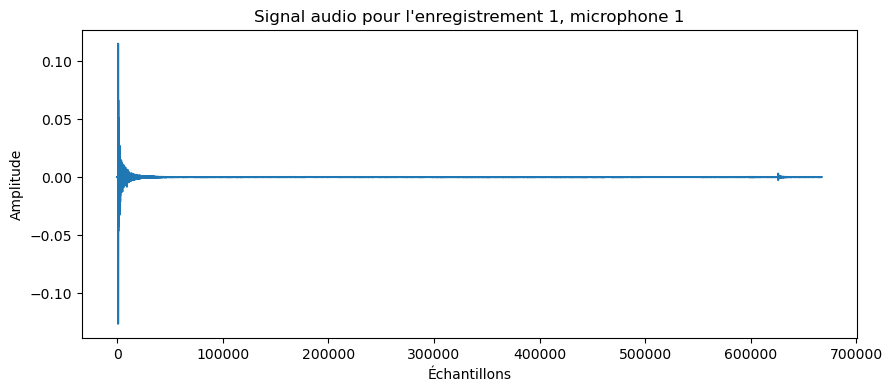

In [34]:
i = 0  # Index de l'enregistrement (0 pour le premier enregistrement)
j = 0  # Index du microphone (0 pour le premier microphone)

# Récupérer le signal audio pour l'enregistrement i et le microphone j
test = RIRs[i, j, :]

print(test)

# Créer une figure
plt.figure(figsize=(10, 4))

# Tracer le signal audio
plt.plot(test)

# Ajouter des étiquettes et un titre
plt.title(f"Signal audio pour l'enregistrement {i+1}, microphone {j+1}")
plt.xlabel("Échantillons")
plt.ylabel("Amplitude")

# Ajuster les limites des axes x et y si nécessaire
# plt.xlim(...)
# plt.ylim(...)

# Afficher la figure
plt.show()

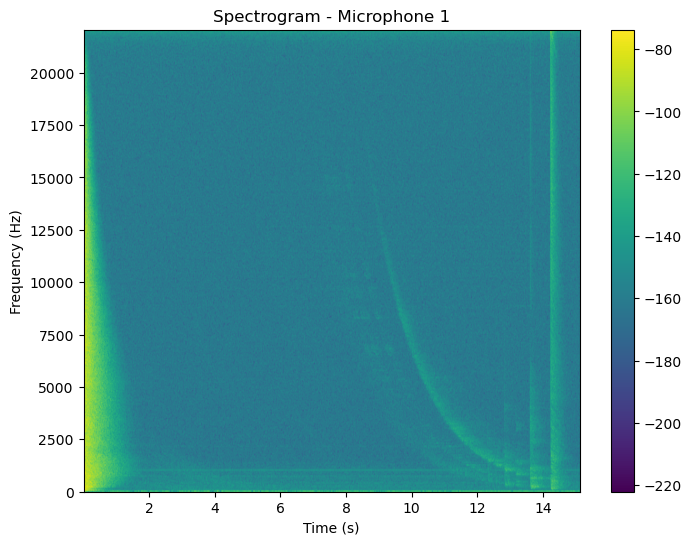

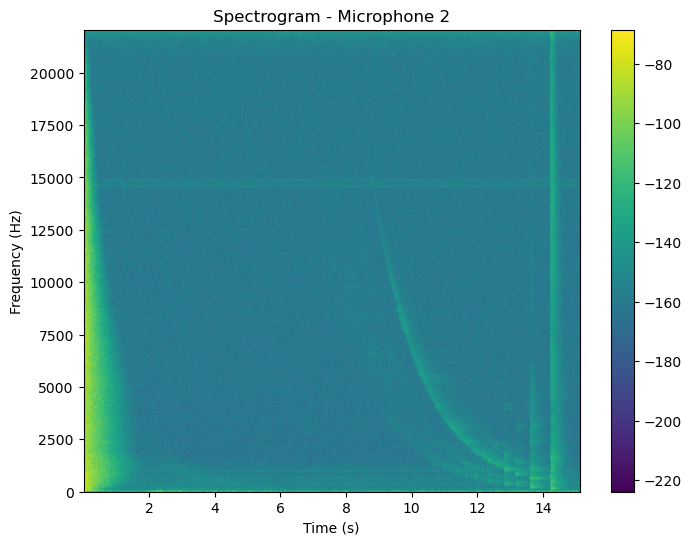

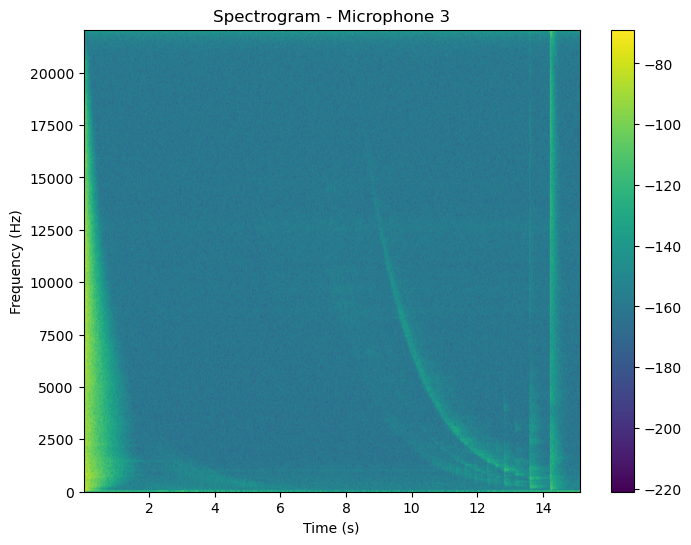

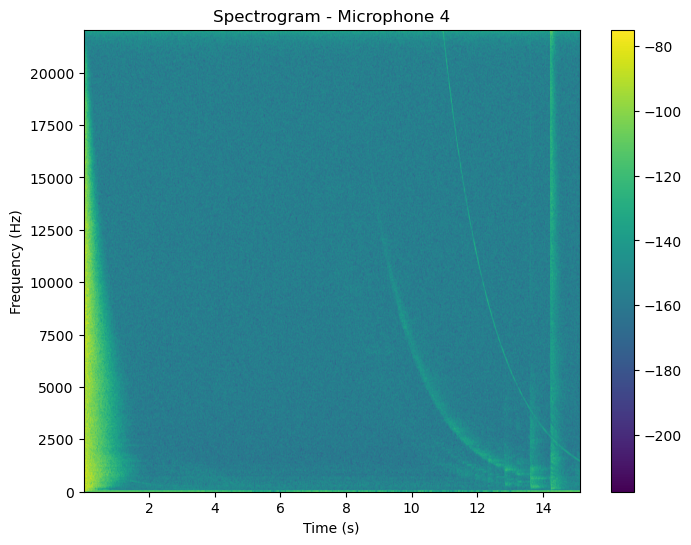

In [42]:
i = 0  # Index de l'enregistrement (0 pour le premier enregistrement)
num_microphones = 4

# Loop over each microphone index
for j in range(num_microphones):
    # Get the signal for the ith recording and the jth microphone
    signal = RIRs[i, j, :]
    
    # Create a new figure and axis for each subplot
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Compute and plot the spectrogram
    spec, freq, t, im = ax.specgram(signal, NFFT=1024, Fs=44100, noverlap=900)
    
    # Set labels and title
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Frequency (Hz)')
    ax.set_title(f'Spectrogram - Microphone {j+1}')
    
    # Add colorbar
    plt.colorbar(im, ax=ax)
    
    # Show the plot
    plt.show()